<a href="https://colab.research.google.com/github/deepak-poudel-10/Portfolio/blob/master/navierstokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Convection <br>
The 1-D Linear Convection equation is the simplest and the most accessible equation in CFD; from
the Navier Stokes equation we kept only the accumulation and convection terms for the 
x-component of the velocity, to make things even simpler, the coefficient of the first derivative of 
the velocity is constant, making the equation linear. The equation is: 
        
$$ \frac{∂u}{∂t}+c\frac{∂u}{∂x}=0 $$<br>
With given initial conditions, this equation reperesents the propagation of that initial wave with
speed c, without change of shape. Let the initial condition be   $ u(x,0)= u_0(x).$ Then the exact solution of the equation is <br>
$$u(x,t) = u_0(x-ct).$$ <br>
Now, we discretize this equation in both space and time, using the forward Difference Scheme for the tume derivative and the Backward Differentiation Scheme for space derivative. Consider discretizing the spatial coordinate x into points that we index from $i=0$ to N, and Stepping in discrete time intervals of size $ \Delta{t}$. <br><p>
From the definition of a derivative, we know that: <br>
    $$\frac{\partial {u}}{\partial{x}} \approx \frac{u(x+\Delta{x})-(x)}{\Delta{x}}$$<Br>
    Then, our discrete equation is :<br>
  $$\frac{u_i^{n+1}-u_i^n}{\Delta{t}} +c\frac{u_i^n-u_{i-1}^n}{\Delta{x}}=0$$
    <br>
    where, $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighbouring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$. We can solve for our unknown to get an equation that allows us to advance in time, as follows: <br>
    $u^{n+1}_i=u^n_i-c\frac{Δt}{\Δx}(u^n_i−u^n_{i−1})$ <br>
Now, this will be implemented in Python

In [ ]:
import numpy as np
from matplotlib import pyplot
import time, sys 
%matplotlib inline

Now we will define few new variables; first we will define an evenly spaced grid of points within a spatial domain that is 4 units of length wide, i.e., $x_i∈(0,4)$. We'll define a variable nx, which will be the number of grid points we want and dx will be the distance between any pair of adjacent grid points.

In [ ]:
nx = 50                  # number of gridpoints
dx=4/(nx-1)             # distance between adjacent pair of grid points
nt= 30                  # number of time steps we want to calculate
dt=.025                 # number of timesteps we want to calculate
c=1                     # assuming the wavespeed of c=1

Now, setting up the initial conditions.<br>
The initial velocity $u_0=4$ in the interval $0.5\le{x}\le{1}$ and $u=1$ everywhere else in (0,4) (i.e., a hat function).

In [ ]:
u = np.ones(nx)
u[int(.5/dx):int(1/dx+1)]=4 # setting u=2 between 0.5 and 1 
print(u)

In [ ]:
pyplot.plot(np.linspace(0,2,nx),u);   #plotting the hat function

Now, we will implement the discretization of the convection equation using a finite difference scheme.
For every element of our array u, we need to perform the operation<br>
$$ u_i^{n+1} = u_i^n - c\frac{Δt}{Δx}(u^n_i−u^n_{i−1})$$<p>
    We will store the result in a new array u_new, which will be the solution $u$ for the next time-step. We will repeate this operation for as many as many time-steps as we specify and then we can see how fat the wave has convicted. 
    </p><p>
    We first initialize our placeholder array u_new to hold the values we calculate from $n+1$ timestep, using once again the NumPy function ones().
    <br><p>
    Then, we will iterate through the u array using for loop
    
    

In [ ]:
u_new =np.ones(nx)
for n in range (nt):
    u_new=u.copy()
    for i in range (1,nx):
        u[i]=u_new[i]-c*dt/dx*(u_new[i]-u_new[i-1])

In [ ]:
pyplot.plot(np.linspace(0,4,nx),u);
pyplot.ylabel('velocity')
pyplot.xlabel('x')
pyplot.title('Wave Profile after 30 iterations')


In [ ]:
u_new =np.ones(nx)
for n in range (nt):
    u_new=u.copy()
    for i in range (1,nx):
        u[i]=u_new[i]-c*dt/dx*(u_new[i]-u_new[i-1])
    pyplot.plot(np.linspace(0,4,nx),u);
    pyplot.ylabel('velocity')
    pyplot.xlabel('x')
    pyplot.title('all 30 iterations in the same plot')

It is clear that the wave is travelling to the positive direction, with no change in shape; the height of the wave is changed untill the solution reaches convergence. <br>
With the values 

# Nonlinear Convection <br>
Now we will be implementing nonlinear convection using the same methods above. The one dimensional convection equation is: <br>
$$ \frac{∂u}{∂t}+u\frac{∂u}{∂x}=0 $$<br><p>
    Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is nonlinear now. We are going to use the same discretization as in above i.e. forward difference in time and backward difference in space. Here is the discretized equation.
      $$\frac{u_i^{n+1}-u_i^n}{\Delta{t}} +u_i^n\frac{u_i^n-u_{i-1}^n}{\Delta{x}}=0$$
    </p>
    Solving for the only wuknown term, $u_i^{n+1}$, yields:
    $$u^{n+1}_i=u^n_i-u_i^n\frac{\Delta{t}}{\Delta{x}}(u^n_i−u^n_{i−1})$$
    <br>
    After this we start by importing necessary python libraries, then we declare some variables that determine the discretization in space and time. Then we create initial condition $u_0$ by initializing the array for the solution using $u=2$ and  0.5≤x≤1 and u=1 everywhere else in (0,2), which is a hat function.
    

In [ ]:
import pylab as pl
#pl.ion()

D = 4.0
T=2.0
nx=201
dx=D/(nx-1)
grid = np.linspace(0,D,nx)
nt=400
dt=T/nt
u=np.ones(nx)
u[int(0.5/dx):int(1/dx+1)]=2.0
un=np.ones(nx)
for n in range (nt):
    un = u.copy()
    for i in range (1,nx):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])
pl.plot(grid,u);
pl.ylabel('velocity')
pl.xlabel('x')
pl.title('Wave Profile after 400 iterations')


In [ ]:
import pylab as pl
pl.ion()
#
D = 4.0
T=2.0
nx=201
dx=D/(nx-1)
grid = np.linspace(0,D,nx)
nt=400
dt=T/nt
u=np.ones(nx)
u[int(0.5/dx):int(1/dx+1)]=2.0
un=np.ones(nx)
for n in range (nt):
    un = u.copy()
    for i in range (1,nx):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])
    pl.plot(grid,u)
    pl.ylabel('velocity')
    pl.xlabel('x')
    pl.title('Wave Profile-all 400 iterations on the same plot')

Comparing the solution with that from the linear convection, the following obeservations can be made:<br>
The wave has moved to the right, with a change in shape. Similarly, the height is decreased which is similar to the linear. Increasing the total time will make the scheme unstable if there are not enough time steps i.e. if the time step is increased the problem loose resolution. If the size of the element, dx, is decreased, so should the time step and it should also be noted that the timestep should be less than half of the grid cell size.

# Diffusion Equation in 1-D<br>
The one-dimentional diffusion equation is:<br>
$$ \frac{∂u}{∂t}=v\frac{∂^2u}{∂x^2} $$<br>
It is different that two previous equations in the sense that it involves second order derivative while the above two don't.

<b> Discretizing </b> $\frac{\partial^2{u}}{\partial{x^2}}$<br><p>
    The Second Order Derivative can be represented geometrically as the line tangent to the curve given by the first derivative. We will discretize the second order dervative with a central difference scheme: a combination of Forward Difference and Backward Difference of the first derivative. Consider the taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:<br>
$$u_{i+1}=u_i+Δx{\frac{∂u}{∂x}}|_i+\frac{Δx^2}{2}{\frac{∂^2u}{∂x^2}}∣_i+\frac{Δx^3}{3!}\frac{∂^3u}{∂x^3}∣_i+O(Δx^4)$$
 
$$u_{i-1}=u_i-Δx{\frac{∂u}{∂x}}|_i+\frac{Δx^2}{2}{\frac{∂^2u}{∂x^2}}∣_i-\frac{Δx^3}{3!}\frac{∂^3u}{∂x^3}∣_i+O(Δx^4)$$ <br>
    If we add therese two expansions,we can see that the odd numbered derivative terms will cancel eachother our. If we neglect any terms of $O(Δx^4)$ or higher, then we can arrange the sum of these two expansions to solve for our second-derivative.<br>
    $$u_{i+1}+u_{i−1}=2u_i+Δx^2\frac{∂^2u}{∂x^2}∣_i+O(Δx^4)$$ <br>
    <br><n>
    Rearranging and then solving for $\frac{∂^2u}{∂x^2}∣_i$, we get:
    <p>
    $$\frac{∂^2u}{∂x^2}∣_i=\frac{u_{i+1}−2u_i+u_{i−1}}{Δx^2}+O(Δx^2)$$
   <n> We can now write the discretized version of the diffusion equation in one dimension:<br>
      $$\frac{u^{n+1}_i−u^n_i}{Δt}=ν\frac{u^n_{i+1}−2u^n_i+u^n_{i−1}}{Δx^2}$$
      <n>
      As before, we notice that we once we have an initial condition, the only unknown is$u^{n+1}_i$, so we re-arrange the equation solving for our unknown:<br>
     $$u^{n+1}_i=u^n_i+ν\frac{Δt}{Δx^2}(u^n_{i+1}−2u^n_i+u^n_{i−1})$$
     <n>
     The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition.Let's continue using the hat function, so at t=0, u=2 in the interval $0.5≤x≤1 $and $u=1$ everywhere else.</n><br>
    <n> <br><b>Note:</b>
     Now here, we use only the diffusion term from the Navier-Stokes equation to determine the velocity. The difusion term is the second order derivative multiplied by the diffusive coefficient , which in this case is the viscosity.</n>

In [ ]:
import numpy as np
import pylab as pl
pl.ion()
D=2.0
nx=41 
dx = D/(nx-1)
grid = np.linspace(0,D,nx)
nt=100        # number od timesteps we want to calculate (iterations)
nu=0.3     # the value of viscosity
sigma =0.2        # parameter, which is releated to Courant nu,ber
dt = sigma*dx**2/nu     # the duration of each time step
u = np.ones(nx)       # initializing the matrix for velocities
u[int(.5/dx) :int( 1/dx+1)] = 2 # input of initial conditions
pl.figure(figsize = (11,7), dpi = 100)
pl.plot(grid, u)
u_new = np.ones(nx)          # placeholder for velocity of the current time step
for n in range (nt):     # loop for time iteration
    u_new = u.copy()       #copy the current values of velocity for each step 
    for i in range (1, nx-1):
        u[i]=u_new[i] + nu*dt/dx**2*(u_new[i+1] - 2*u_new[i] + u_new[i-1])
    pl.plot(grid,u)
    pl.ylim([1.,2.2])
    pl.xlabel('X')
    pl.ylabel('velocity')
    pl.title("1D diffusion plot for every iteration")
   

In [ ]:
import numpy as np
import pylab as pl
pl.ion()
D=2.0
nx=41 
dx = D/(nx-1)
grid = np.linspace(0,D,nx)
nt=100        # number od timesteps we want to calculate (iterations)
nu=0.3     # the value of viscosity
sigma =0.2        # parameter, which is releated to Courant nu,ber
dt = sigma*dx**2/nu     # the duration of each time step
u = np.ones(nx)       # initializing the matrix for velocities
u[int(.5/dx) :int( 1/dx+1)] = 2 # input of initial conditions
pl.figure(figsize = (11,7), dpi = 100)
pl.plot(grid, u)
u_new = np.ones(nx)          # placeholder for velocity of the current time step
for n in range (nt):     # loop for time iteration
    u_new = u.copy()       #copy the current values of velocity for each step 
    for i in range (1, nx-1):
        u[i]=u_new[i] + nu*dt/dx**2*(u_new[i+1] - 2*u_new[i] + u_new[i-1])
pl.plot(grid,u)
pl.ylim([1.,2.2])
pl.xlabel('X')
pl.ylabel('velocity')
pl.title("1D diffusion plot after final iteration")

<b> Discussion</b>
<br>
Blue graph in the figure represents the initial condition and the orange color represents the solution. As it can be seen that the wave is stationary and the amplitude is decaying, influencing the velocity of neighbouring cells.The physical reason for diffusion is the chaotic movement of the fluid particles. The Courant number is used here to calculate the time step. After running the program it can be seen that the wave does not move along the x axis, but the profile changes in a way that the velocitie between 0.5 and 1 are decreasing and the velocities in the vicinities are increasing. Given, the more time for diffusion, the velocities are reducing even more.

# Burger's Equation <br>
Burger's Equation in one spatial dimension is given as:<br>
$$\frac{∂u}{∂t}+u\frac{∂u}{∂x}=ν\frac{∂^2u}{∂x^2}$$
<br>
It is the combination of non-linear convection and diffusion. 
<n>
    We can discretize it using the methods we have already detailed above. Using forward difference for time, backward difference for space and our second order method for the second derivative yields: <br>
    $$\frac{u^{n+1}_i−u^n_i}{Δt}+u^n_i\frac{u^n_i−u^n_{i−1}}{Δx}=ν\frac{u^n_{i+1}−2u^n_i+u^n_{i−1}}{Δx^2}$$
    <br>
    After putting the initial conditions, the only unknown in the above equation will be $u^{n+1}_i$. And we will step in time as follows:
    <br>
    $$u^{n+1}_i=u^n_i−u^n_i\frac{Δt}{Δx}(u^n_i−u^n_{i−1})+ν\frac{Δt}{Δx^2}(u^n_{i+1}−2u^n_i+u^n_{i−1})$$
    <br>
    <b> Initial and Boundary Conditions</b><br>
    To examine some interesting properties of Burger's equation, it is helpful to use different initial and boundary conditions than we have been using for above steps. 
    <n>
       Our initial condition for this problem will be: <br>
        $$ u=−\frac{2ν}{ϕ}\frac{∂ϕ}{∂x}+4\qquad(1)$$<br>
       $$ϕ= exp(\frac{-x^2}{4ν})+exp(\frac{−(x−2π)^2}{4ν})\qquad(2)$$<br>
        This has an analytical solution, given by:<br>
         $$ u=−\frac{2ν}{ϕ}\frac{∂ϕ}{∂x}+4\qquad(3)$$<br>
        $$ϕ= exp(\frac{-(x-4t)^2}{4ν(t+1)})+exp(\frac{−(x−4t-2π)^2}{4ν(t+1)})\qquad(4)$$<br>
        Our boundary condition will be: <br>
        $$u(0)=u(2π)$$
        <br>
        This is called periodic boundary condition.

In [ ]:
import sympy as sp
import numpy as np
import pylab as pl
pl.ion()

#Setting up symbolic variables
x,nu,t=sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 /(4 * nu * (t + 1))) +sp.exp(-(x - 4 * t - 2 * sp.pi)**2 
                                                           / (4 * nu * (t + 1))))
phi
        

In [ ]:
phiprime = phi.diff(x)
phiprime

In [ ]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

<b> Lambdify</b>
To lambdify this expression in to a usable function, we tell lambdify which variables to request and the function we want to plug them into.


In [ ]:
ufunc = lambdify((t, x, nu), u) # transform the symbolic equation into a function using lambdify
print(ufunc(1, 4, 3))

In [ ]:
# Variables declaration
nx = 101 # number of nodes in the domain
nt = 100 # number of time steps
dx = 2*np.pi/(nx-1) # dimension of one element/cell
nu = 0.07 # viscosity
dt = dx*nu # the timestep is defined based on the cell dimension
T = nt*dt # total time of the simulation

grid = np.linspace(0, 2*np.pi, nx) # generating the all grid points
un = np.empty(nx) # just for array creation
t = 0

# Initializing the velocity function
u = np.asarray([ufunc(t, x, nu) for x in grid])
#print u
u

Text(0.5, 1.0, '1D Burgers Equation- Initial Condition')

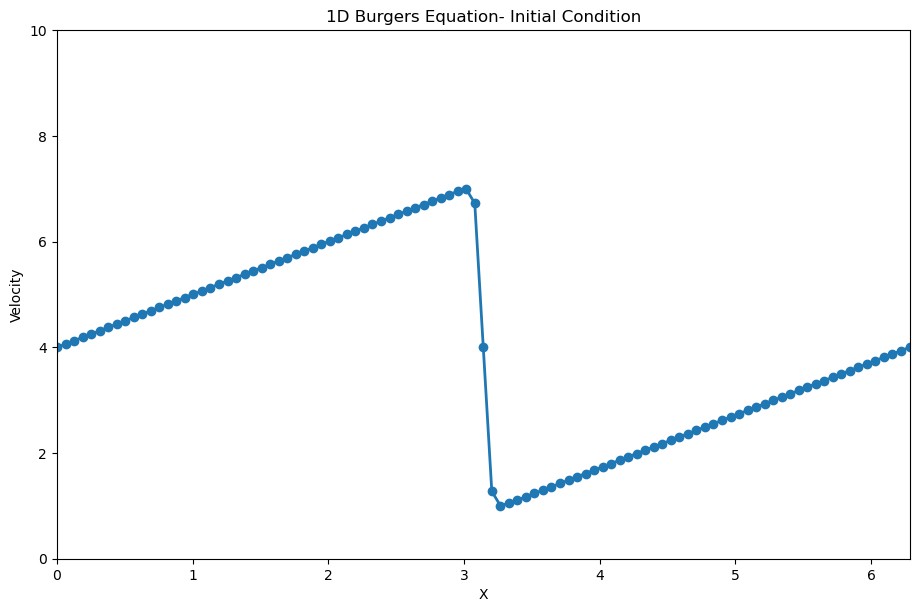

In [ ]:
# Make a plot of the initial condition
pl.figure(figsize=(11,7),dpi=100);
pl.plot(grid,u,marker='o',lw=2)
pl.xlim([0,2*np.pi])
pl.ylim([0,10])
pl.xlabel('X')
pl.ylabel("Velocity")
pl.title('1D Burgers Equation- Initial Condition')

This is definately not the hat function we've been dealing with untill now. We call it a ''saw-tooth function'', where we can see the initial conditions.<br>
<b> Periodic Boundary COnditions</b>
<br>
And finally, the solution after 100 time steps; a comparison between the analytical and the numerical solution is done. The saw tooth function used as initial condition is basically a periodic wave profile; applying the scheme for convection and diffusion in time makes the profile move in the domain; a change in shape is observed both in the numerical and analytical solutions. <br>


Text(0.5, 1.0, '1D Burgers Equation - Solutions')

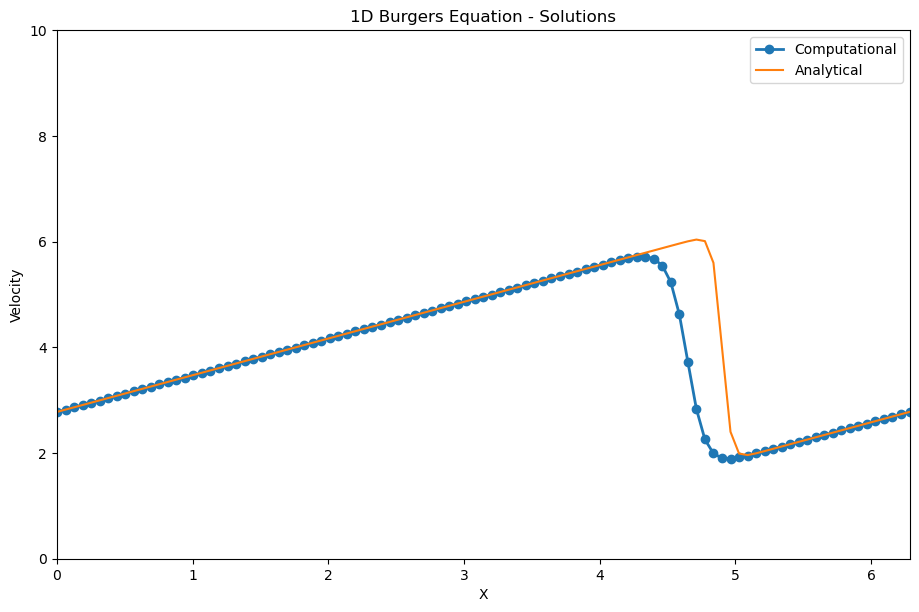

In [ ]:
# Applying the scheme with periodic boundary conditions in mind 
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytic = np.asarray([ufunc(T, xi, nu) for xi in grid])
 
    
    
    #Make a plot in which both solutions are plotted
pl.figure(figsize=(11,7), dpi=100)
pl.plot(grid, u, marker='o', lw=2, label='Computational')
pl.plot(grid, u_analytic, label='Analytical')
pl.xlim([0, 2*np.pi])
pl.ylim([0,10])
pl.legend();
pl.xlabel('X')
pl.ylabel('Velocity') 
pl.title('1D Burgers Equation - Solutions')
        

Now we will extend the above steps in to 2D. To extend the 1D finite difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to x in the variation in the x direction at constant y. <br>
In 2D soace, a rectangular (uniform) grid is defined by the points with coordinates: <br>
$$x_i=x_0+iΔx$$
$$y_i=y_0+iΔy$$<br>
Now, define $u_{i,j}=u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ acting separately on the<i> i</i> and <i>j</i> indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$. <br>
Hence, for a first-order partial derivative in the x-direction, a finite-difference formula is:<br>
$$\frac{∂u}{∂x}∣_{i,j}=\frac {u_{i+1,j}−u_{i,j}}{Δx}+O(Δx)$$
<br>
# Linear convection
<br>
The partial differential equation governing 2-D Linear Convection is written as: <br>
$$\frac{∂u}{∂t}+c\frac {∂u}{∂x}+c\frac{∂u}{∂y}=0$$ <br>
This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.<br>
Again, the timesteps will be discretized as a forward difference and both spatial steps will be discretized as backward differences. <br>
With 1-D implementations, we used <i>i</i> subscripts to denote movement in space (e.g. $$u^n_i-u^n_{i-1}$$. Now that we have two dimensions to account for, we need to add a second subscript, <i>j</i>, to account for all the information in the regime.<br>
Here,we will again use <i>i</i> as the index for our <i>x</i> values, and we'll add the <i>j</i> subscript to track our <i>y</i> values. <br>
Now, our discretization of the PDE is given as : <br>
$$\frac{u^{n+1}_{i,j}−u^n_{i,j}}{Δt}+c\frac {u^n_{i,j}−u^n_{i−1,j}}{Δx}+c\frac{u^n_{i,j}−u^n_{i,j−1}}{Δy}=0 $$<br>
Now, we will solve for the only unknown <br>
$$u^{n+1}_{i,j}=u^n_{i,j}−c\frac{Δt}{Δx}(u^n_{i,j}−u^n_{i−1,j})−c\frac{Δt}{Δy}(u^n_{i,j}−u^n{i,j−1})$$<br>
We will solve this equation witn the following initial conditions.
 